# Spectral Embedding

## Network compression

Networks are a high-dimensional discrete data that can be difficult to analyze with traditional machine learning methods that assume continuous and smooth data. Spectral embedding is a technique to embed networks into low-dimensional spaces.

Let us approach the spectral embedding from the perspective of network compression.
Suppose we have an adjacency matrix $\mathbf{A}$ of a network.
The adjacency matrix is a high-dimensional data, i.e., a matrix has size $N \times N$ for a network of $N$ nodes.
We want to compress it into a lower-dimensional matrix $\mathbf{U}$ of size $N \times d$ for a user-defined small integer $d < N$.
A good $\mathbf{U}$ should preserve the network structure and thus can reconstruct the original data $\mathbf{A}$ as closely as possible.
This leads to the following optimization problem:

$$
\min_{\mathbf{U}} J(\mathbf{U}),\quad J(\mathbf{U}) = \| \mathbf{A} - \mathbf{U}\mathbf{U}^\top \|_F^2
$$

where:

1. $\mathbf{U}\mathbf{U}^\top$ is the outer product of $\mathbf{U}$ and represents the reconstructed network.
2. $\|\cdot\|_F$ is the Frobenius norm, which is the sum of the squares of the elements in the matrix.
3. $J(\mathbf{U})$ is the loss function that measures the difference between the original network $\mathbf{A}$ and the reconstructed network $\mathbf{U}\mathbf{U}^\top$.

By minimizing the Frobenius norm with respect to $\mathbf{U}$, we obtain the best low-dimensional embedding of the network.


### An intuitive solution for the optimization problem

Let us first understand the solution intuitively.
Consider the spectral decomposition of $\mathbf{A}$:

$$
\mathbf{A} = \sum_{i=1}^N \lambda_i \mathbf{u}_i \mathbf{u}_i^\top
$$

where $\lambda_i$ are weights and $\mathbf{u}_i$ are column vectors. Each term $\lambda_i \mathbf{u}_i \mathbf{u}_i^\top$ is a rank-one matrix that captures a part of the network's structure. The larger the weight $\lambda_i$, the more important that term is in describing the network.


To compress the network, we can select the $d$ terms with the largest weights $\lambda_i$. By combining the corresponding $\mathbf{u}_i$ vectors into a matrix $\mathbf{U}$, we obtain a good low-dimensional embedding of the network.

![](../figs/spectral-decomposition.jpg)

For a formal proof, please refer to the [Appendix section](./appendix.md).

### An example for the spectral embedding

Let us demonstrate the results with a simple example as follows.

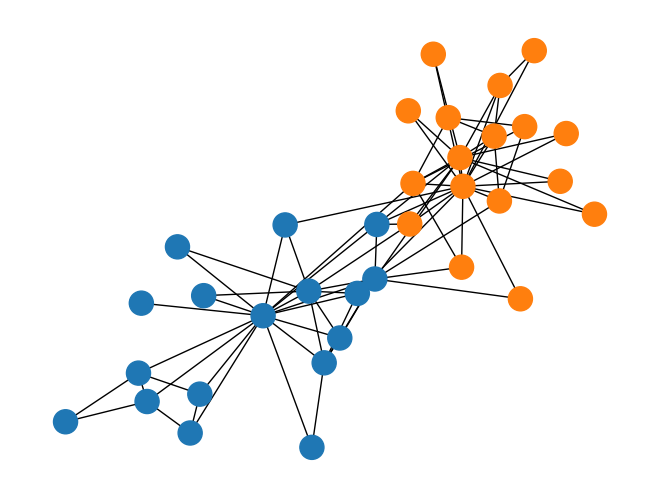

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small example network
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
labels = np.unique([d[1]['club'] for d in G.nodes(data=True)], return_inverse=True)[1]
cmap = sns.color_palette()
nx.draw(G, with_labels=False, node_color=[cmap[i] for i in labels])

/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/skojaku-admin/miniforge3/envs/applsoftcomp/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


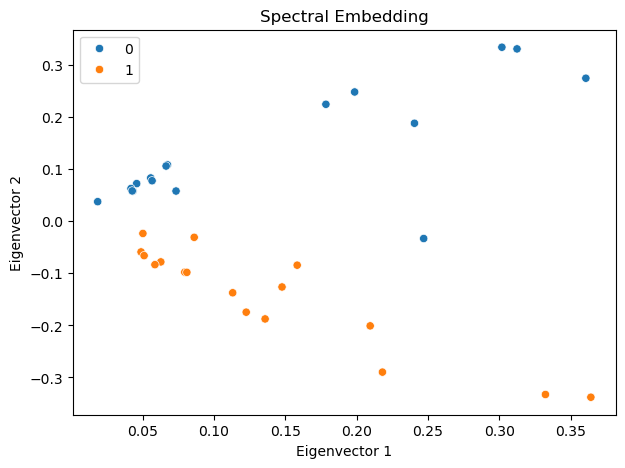

In [2]:
# Compute the spectral decomposition
eigvals, eigvecs = np.linalg.eig(A)

# Find the top d eigenvectors
d = 2
sorted_indices = np.argsort(eigvals)[::-1][:d]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# Plot the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = eigvecs[:, 0], y = eigvecs[:, 1], hue=labels, ax=ax)
ax.set_title('Spectral Embedding')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
plt.show()

Interestingly, the first eigenvector corresponds to the eigen centrality of the network, representing the centrality of the nodes.
The second eigenvector captures the community structure of the network, clearly separating the two communities in the network.

```{footbibliography}
```